In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from copy import deepcopy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
#P.S. I run into a big error later on and end up functionally starting over. 
#My code from then on represents how I would have done this assignment from scratch

In [3]:
red_wine = pd.read_csv('winequality-red.csv')

red_wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [6]:
#It seems my csv is separated with semicolons rather than commas
#I have to specify that the delimiter is semicolons

red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [8]:
print(red_wine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [10]:
#Column types look good, let's check for nulls
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
#Checking value ranges
red_wine.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [16]:
red_wine.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [18]:
red_wine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [20]:
#Seems to make sense, now to check for correlations between the features

corr_matrix = red_wine.corr()

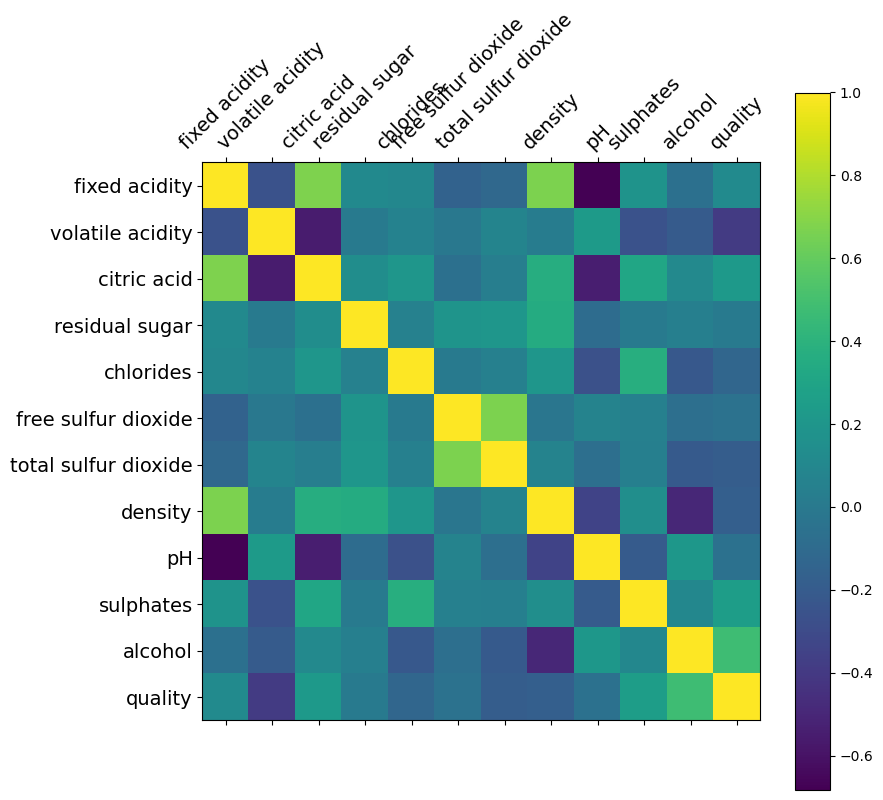

In [22]:
#Plotting the correlations

f = plt.figure(figsize=(9, 9))
plt.matshow(red_wine.corr(), fignum=f.number)
plt.xticks(range(red_wine.select_dtypes(['number']).shape[1]), 
           red_wine.select_dtypes(['number']).columns,
           fontsize=14, 
           rotation=45)
plt.yticks(range(red_wine.select_dtypes(['number']).shape[1]), 
           red_wine.select_dtypes(['number']).columns,
           fontsize=14)
cb = plt.colorbar()

In [24]:
#No extreme correlations with my target variable
#Now to make my pipeline; dropping my target from the X

X = red_wine.drop(columns='quality')
y = red_wine['quality']

In [ ]:
#Since quality will be my categorical, I am going to convert the type just to be sure

red_wine['quality'] = red_wine['quality'].astype('category')
print(red_wine.dtypes)

In [26]:
#Splitting into testing and training sets, using a size of .3 because it is a smaller dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [28]:
#Preprocessing my X with Standard Scaler

std_scaler = StandardScaler().fit(X_train)

def scaler(M):
    A = np.copy(M)
    A = std_scaler.transform(M)
    return A

In [30]:
#My original X_test is left unaffected because I made this scaler copy

scaler(X_test)

array([[ 1.32532778, -0.27064497,  1.87650163, ..., -0.31949283,
        -0.01471042,  1.1858683 ],
       [-0.60968641, -0.10396818, -0.48548411, ...,  1.40890514,
         0.38262306, -0.8670868 ],
       [-1.95833266,  1.17388719, -1.4097394 , ...,  4.66627054,
        -0.4120439 ,  1.93239743],
       ...,
       [ 0.91487022, -0.99291105,  0.69550876, ..., -0.65187705,
        -0.92290123, -0.8670868 ],
       [-0.84423358,  1.72947648, -0.33144156, ...,  1.47538199,
         0.32586114, -1.11592984],
       [ 0.56304946, -0.15952711,  0.43877118, ..., -0.25301598,
         0.60967077,  0.34602303]])

In [32]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
416,10.6,0.480,0.64,2.2,0.111,6.0,20.0,0.99700,3.26,0.66,11.700000
749,7.3,0.510,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.500000
1321,5.0,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.500000
1064,8.2,0.740,0.09,2.0,0.067,5.0,10.0,0.99418,3.28,0.57,11.800000
659,7.1,0.840,0.02,4.4,0.096,5.0,13.0,0.99700,3.41,0.57,11.000000
...,...,...,...,...,...,...,...,...,...,...,...
69,8.0,0.705,0.05,1.9,0.074,8.0,19.0,0.99620,3.34,0.95,10.500000
207,7.8,0.570,0.31,1.8,0.069,26.0,120.0,0.99625,3.29,0.53,9.300000
786,9.9,0.350,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,9.500000
1514,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333


In [40]:
#Same for my categorical y

oh_encoder = OneHotEncoder(sparse_output=False)
oh_encoder.fit(np.array(y_train).reshape(-1, 1))

def encoder(M):
    return oh_encoder.transform(np.array(M).reshape(-1, 1))

In [44]:
y_train_encoded = encode_labels(y_train)
y_test_encoded = encode_labels(y_test)

print("Encoded y_train:\n", y_train_encoded)
print("Encoded y_test:\n", y_test_encoded)

Encoded y_train:
 [[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
Encoded y_test:
 [[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [46]:
logistic_pipeline.fit(X_train, y_train_encoded)

ValueError: y should be a 1d array, got an array of shape (1119, 6) instead.

In [ ]:
#I got a value error, so let me try a different encoding method

In [ ]:
pp_scaler = FunctionTransformer(scaler)

In [62]:
logistic_pipeline = Pipeline(steps=[
    ('scaler', pp_scaler),
    ('learner', LogisticRegression())  
])

In [50]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

logistic_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('scaler',
                 FunctionTransformer(func=<function scaler at 0x108de25c0>)),
                ('learner', LogisticRegression())])

In [108]:
#Pipeline for the logistic regression is done, now I will check the performance with a confusion matrix

cm_log = confusion_matrix(y_test_encoded, y_pred_logistic)

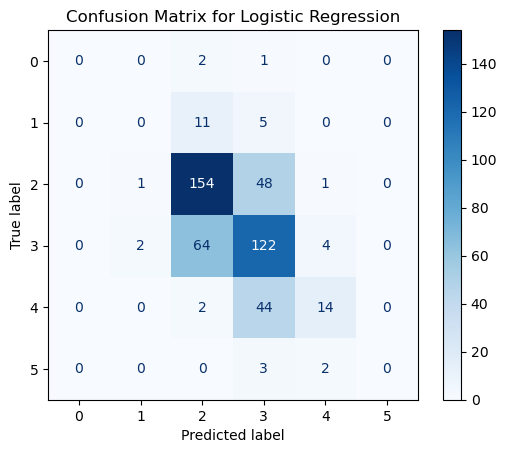

In [110]:
#Visualizing the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [112]:
#F1 score turns out to be average

f1 = f1_score(y_test_encoded, y_pred_logistic, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.58


In [100]:
#Hopefully the classifier performs better; making a pipeline for RandomForestClassifier now

classifier_pipeline = Pipeline(steps=[
    ('scaler', pp_scaler),
    ('classifier', RandomForestClassifier())  
])

In [102]:
classifier_pipeline.fit(X_train, y_train_encoded)
y_pred_classifier = classifier_pipeline.predict(X_test)

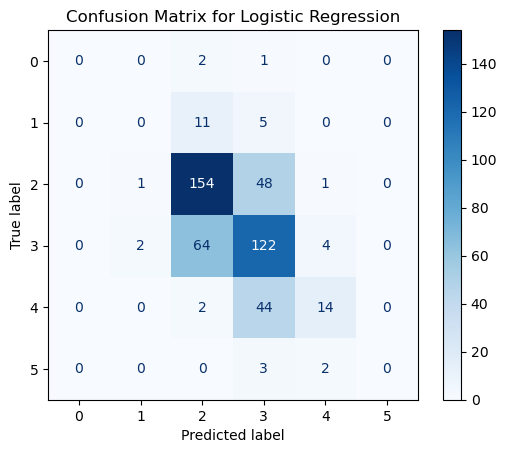

In [104]:
#Confusion matrix for the RandomForest test

cm_log = confusion_matrix(y_test_encoded, y_pred_classifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [106]:
#Still average, but better. I will go with this model

f1 = f1_score(y_test_encoded, y_pred_classifier, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.64


In [128]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200], 
    'classifier__max_depth': [None, 10, 20, 30], 
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4], 
    'classifier__max_features': ['sqrt', 'log2'] 
}

In [139]:
grid_search = GridSearchCV(classifier_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        FunctionTransformer(func=<function scaler at 0x12fc86de0>)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [141]:
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

In [143]:
print("Best Parameters for Random Forest:", best_parameters)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Cross-Validation Score: 0.6943545803971813


In [212]:
sample_row = X_train.iloc[0] 
sample = np.array(sample_row).reshape(1, -1)
sample_scaled = pp_scaler.transform(sample)

/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [205]:
def wine_quality(sample_scaled, best_model):
    result = best_model.predict(sample_scaled)
    return result

In [209]:
#I got 3, which is wrong for this row. But let's see if I get a different result with a different row. 

predicted_quality = wine_quality(sample_scaled, best_model)
print("Predicted Wine Quality:", predicted_quality[0])

Predicted Wine Quality: 3


/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [219]:
sample_row = X_test.iloc[5] 
sample = np.array(sample_row).reshape(1, -1)
sample_scaled = pp_scaler.transform(sample)

def wine_quality(sample_scaled, best_model):
    result = best_model.predict(sample_scaled)
    return result

/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [221]:
#Once again 3, something is wrong

predicted_quality = wine_quality(sample_scaled, best_model)
print("Predicted Wine Quality:", predicted_quality[0])

Predicted Wine Quality: 3


/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [230]:
#Let's see if the rows are fundamentally different

sample_row_0 = X_test.iloc[0]
sample_row_5 = X_test.iloc[5]
print("Sample Row 0:", sample_row_0.values)
print("Sample Row 5:", sample_row_5.values)

Sample Row 0: [10.6    0.48   0.64   2.2    0.111  6.    20.     0.997  3.26   0.66
 11.7  ]
Sample Row 5: [ 7.7      0.39     0.12     1.7      0.097   19.      27.       0.99596
  3.16     0.49     9.4    ]


In [234]:
#OK looks good, let's see if they're scaled right

sample_scaled_0 = pp_scaler.transform(np.array(sample_row_0).reshape(1, -1))
sample_scaled_5 = pp_scaler.transform(np.array(sample_row_5).reshape(1, -1))
print("Scaled Sample Row 0:", sample_scaled_0)
print("Scaled Sample Row 5:", sample_scaled_5)

Scaled Sample Row 0: [[ 1.32532778 -0.27064497  1.87650163 -0.2516603   0.47217359 -0.97342012
  -0.82970428  0.12995709 -0.31949283 -0.01471042  1.1858683 ]]
Scaled Sample Row 5: [[-0.37513924 -0.77067534 -0.79356921 -0.61274232  0.18447294  0.26172686
  -0.6186063  -0.42923414 -0.98426127 -0.97966316 -0.96040294]]


/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [239]:
#Looks different, let's run a loop to test multiple rows 

for i in range(10):
    sample_row = X_test.iloc[i]
    sample_scaled = pp_scaler.transform(np.array(sample_row).reshape(1, -1))
    predicted_quality = wine_quality(sample_scaled, best_model)
    print(f"Predicted Wine Quality for row {i}:", predicted_quality[0])

Predicted Wine Quality for row 0: 3
Predicted Wine Quality for row 1: 3
Predicted Wine Quality for row 2: 1
Predicted Wine Quality for row 3: 2
Predicted Wine Quality for row 4: 2
Predicted Wine Quality for row 5: 3
Predicted Wine Quality for row 6: 3
Predicted Wine Quality for row 7: 3
Predicted Wine Quality for row 8: 3
Predicted Wine Quality for row 9: 3


/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Volumes/Mac/opt/anaconda3/lib/pyth

In [7]:
#Clearly my y is messed up. I believe converting it to categorical and then encoding it was a mistake
#I reset my kernel and am going to start over

In [9]:
#Importing the data fresh

red_wine = pd.read_csv('winequality-red.csv')
red_wine.head()
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
#Keeping my target as is for the y

X = red_wine.drop(columns='quality')
y = red_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [13]:
#Preprocessing the X
#I am going to leave the y as is because it is already a numerical categoy and shouldn't need encoding
#I am also going to try and incoporate preprocessing steps within my pipeline

logistic_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('learner', LogisticRegression())  
])
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('learner', LogisticRegression())])

In [15]:
#It worked with about 80% less steps, great, moving onto the confusion matrix to see if it's any good

y_pred_logistic = logistic_pipeline.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.58


In [19]:
#The same as before, let's try Random Forest again

classifier_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())  
])
classifier_pipeline.fit(X_train, y_train)
y_pred_classifier = classifier_pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred_classifier, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.63


In [25]:
#OK I got the same score but it's still the best. Let's try another classifier in case we can do better

decision_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())  
])
decision_pipeline.fit(X_train, y_train)
y_pred_decision = decision_pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred_decision, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.58


In [ ]:
#Looks like Random Forest is still the best. Let's get the best parameters for a grid search

In [27]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200], 
    'classifier__max_depth': [None, 10, 20, 30], 
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4], 
    'classifier__max_features': ['sqrt', 'log2'] 
}
grid_search = GridSearchCV(classifier_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [32]:
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

In [34]:
print("Best Parameters for Random Forest:", best_parameters)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Cross-Validation Score: 0.6898983023702755


In [44]:
#Everything went as expected, let's test it

scaler = StandardScaler().fit(X_train)

sample_row = X_train.iloc[0] 
sample = np.array(sample_row).reshape(1, -1)
sample_scaled = scaler.transform(sample)

def wine_quality(sample_scaled, best_model):
    result = best_model.predict(sample_scaled)
    return result

/Volumes/Mac/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
#Running a loop on my results like before

for i in range(10):
    sample_row = X_test.iloc[i]
    sample_scaled = scaler.transform(np.array(sample_row).reshape(1, -1))
    predicted_quality = wine_quality(sample_scaled, best_model)
    print(f"Predicted Wine Quality for row {i}:", predicted_quality[0])

NameError: name 'X_test' is not defined

In [1]:
#Looks to me like it makes more sense, let's see if it predicted it right

sample_row_8 = X_test.iloc[8]
print("Sample Row 8:", sample_row_8.values)

NameError: name 'X_test' is not defined

In [ ]:
#A quick crossreference shows that this sample row predicted wine quality correctly, very nice

In [ ]:
#Re-do but impute fixed acidity